<a href="https://colab.research.google.com/github/mrv7777/MLP/blob/main/MLP_Practice_Oppe_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Access the dataset from here :

https://drive.google.com/file/d/1XztaPmhMMhBoEp7XuyDGS5Il_kLUlEEl/view?usp=sharing

### Notes:
* This exam consists of a Regression problem.  
* The target feature is 'cltv'.
* Random state should be taken as 42 wherever applicable.

# Metadata

1. id-Unique identifier of a customer  
2. gender-Gender of the customer   
3. area-Area of the customer   
4. qualification-Highest Qualification of the customer  
5. income-Income earned in a year (in rupees).   
6. marital_status- 0:Single, 1: Married
7. vintage-No. of years since the first policy date.  
8. claim_amount-Total Amount Claimed by the customer (in rupees)
9. num_policies-Total no. of policies issued by the customer
10. policy-Active policy of the customer
11. type_of_policy-Type of active policy
12. cltv- Customer life time value. It is the total amount of money a customer is expected to spend with your business, or on your products, during the lifetime of an average business relationship. [TARGET]

In [53]:
import pandas as pd
import numpy  as np
import seaborn as sns

In [54]:
df = pd.read_csv('V1.csv')

Q.2 [Marks: 2] How many total number of features (excluding target variable) are there in the dataset?
Options

(a) 1000

(b) 11

(c) 12

(d) 10

In [55]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,27529,Male,Urban,High School,42.99,0,0,3849.0,1,A,Platinum,66816
1,27116,Male,Rural,Bachelor,5.33,1,6,3006.0,More than 1,A,Gold,67164
2,6499,Female,Urban,High School,2.26,1,2,NaN,More than 1,A,Platinum,68076
3,61863,Male,Rural,High School,20.29,1,8,2844.0,More than 1,A,Platinum,63276
4,25045,Female,Urban,High School,5.63,0,6,6370.0,More than 1,A,Platinum,245844


In [56]:
df.drop('cltv', axis=1).shape[1]

11

## Q.3 [Marks: 2] What are the unique values of feature `Types of Policy` in the dataset?

A) ['Bronze', 'Gold']

B) ['Gold', 'Silver']

C) ['Platinum', 'Gold', 'Silver', 'Bronze]

D) ['Platinum', 'Gold', 'Silver']


In [57]:
df.type_of_policy.unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

## Q.4 [Marks: 3] Which of the following columns have categorical data?[MSQ]

A) income

B) id

C) area

D) claim_amount

E) qualification

In [58]:
df.describe()

,id,income,marital_status,vintage,claim_amount,cltv
count,6257.000000,5856.000000,6257.000000,6257.000000,5897.000000,6257.000000
mean,44840.267381,13.644030,0.576474,4.611475,4343.455316,97788.084385
std,25677.961183,20.325859,0.494157,2.291584,3323.570342,91457.709902
min,16.000000,0.030000,0.000000,0.000000,0.000000,24876.000000
25%,22477.000000,4.840000,0.000000,3.000000,2359.000000,52356.000000
50%,45028.000000,7.045000,1.000000,5.000000,4079.000000,66288.000000
75%,67353.000000,9.140000,1.000000,6.000000,6093.000000,103380.000000
max,89383.000000,99.840000,1.000000,8.000000,28859.000000,670368.000000


## Q5.[Marks: 4] Plot the `heatmap` and mark the pair which has the highest positive correlation value. [MCQ]

A) claim_amount & income

B) income & cltv

C) vintage & income.

D) claim_amount & cltv.

<Axes: >

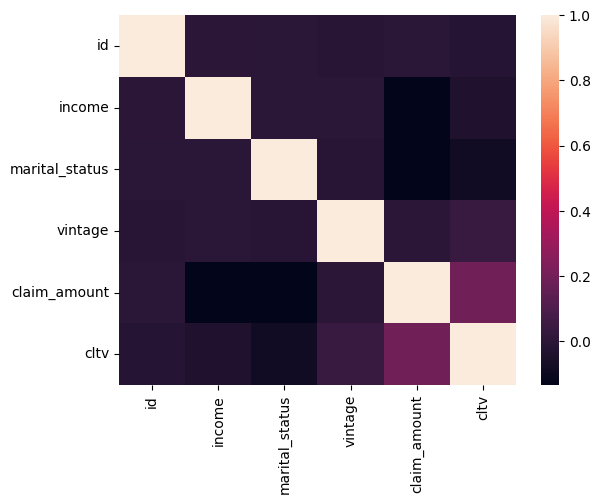

In [59]:
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(data=df_numeric.corr())

## Q6 [marks: 2] Which of the following features have `missing` values?[MSQ]

Options:

A) gender

B) area

C) qualification

D) income

E) claim_amount

F) policy

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6257 non-null   int64  
 1   gender          6257 non-null   object 
 2   area            5873 non-null   object 
 3   qualification   6257 non-null   object 
 4   income          5856 non-null   float64
 5   marital_status  6257 non-null   int64  
 6   vintage         6257 non-null   int64  
 7   claim_amount    5897 non-null   float64
 8   num_policies    6257 non-null   object 
 9   policy          5885 non-null   object 
 10  type_of_policy  6257 non-null   object 
 11  cltv            6257 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 586.7+ KB


##Q7 [Marks = 4] Break the dataset into features(`X`) and label (`y`), where the column `cltv` goes to `y` and the rest of the columns go to `X`. Enter the avg value of `cltv` column? [NAT]


In [61]:
X = df.drop('cltv',axis=1)
y = df.cltv

In [62]:
y.mean()

97788.08438548826

# Q8 [Marks : 3] Split the dataset into training and test dataset using `train_test_split` into `70:30` ratio while keeping random_state =42. What is the shape of the training set (X_train) ? [MCQ]

Ans:

A) (4379, 11)

B) (4392, 13)

C) (4340, 11)

D) (4379, 15)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [65]:
Xtrain.shape

(4379, 11)

## Q9 [Mark 2] Drop(remove) `id` column from train and test data because it is not useful in model training. Now how many feature columns are remaining in the training dataset? [NAT]

In [66]:
Xtrain = Xtrain.drop('id',axis=1)
Xtest = Xtest.drop('id',axis=1)

In [67]:
Xtrain.shape[1]

10

##Q10 [Marks2] Compute and write median of the `income` column of X_train while ignoring the missing values. Replace all NaN values in the income column of X_train and X_test by the median  computed from the X_train (upto two decimal). [NAT].

In [68]:
med = Xtrain['income'].median()

In [69]:
from sklearn.impute import SimpleImputer

In [70]:
Xtrain['income'] = Xtrain['income'].replace(np.NaN,med)
Xtest['income'] = Xtest['income'].replace(np.NaN,med)

##Q11 [2 Marks] Which is the most frequent value in the `policy` column of X_train? Replace all NaN value in `policy` column of X_train and X_test by most frequent value in X_train [MCQ]

a) 'A'

b) 'B'

c) 'C'

d) None of the above

In [71]:
Xtrain.policy.value_counts()

,count
policy,
A,2583
B,1160
C,392


In [72]:
Xtrain.policy.unique()

array(['A', 'C', 'B', nan], dtype=object)

In [73]:
Xtrain['policy'] = Xtrain['policy'].replace(np.NaN,'A')
Xtest['policy'] = Xtest['policy'].replace(np.NaN,'A')

##Q12 [2 Marks] Which is the most frequent value in the `area` column of X_train? Replace all NaN value in `area` column of X_train and X_test by most frequent value from X_train [MCQ]

a) 'Urban'

b) 'Rural'

c) 'Semi-Urban'

d) None of the above

In [74]:
Xtrain.area.value_counts()

,count
area,
Urban,2920
Rural,1191


In [76]:
Xtrain['area'] = Xtrain['area'].replace(np.NaN,'Urban')
Xtest['area'] = Xtest['area'].replace(np.NaN,'Urban')

## Q13[2 Marks] Replace all NaN value in claim_amount column of X_train and X_test by 0 (Zero). After Replacing NAN values from claim_amount column what is the standard deviation of claim_amount column in X_train. (correct upto two decimal places) [NAT]

In [77]:
Xtrain['claim_amount'] = Xtrain['claim_amount'].replace(np.NaN,0)
Xtest['claim_amount'] = Xtest['claim_amount'].replace(np.NaN,0)

In [78]:
np.std(Xtrain['claim_amount'])

3358.272390023111

#Q14 [Marks: 4] Apply `MinMaxScaler` on `income` column of X_train. Compute and write median of `income` column? (correct Upto 2 decimal)[NAT]

In [102]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [80]:
from sklearn.compose import ColumnTransformer

In [103]:
minmax_scale = MinMaxScaler()
one_hotencode = OneHotEncoder()

In [82]:
transfor = [('min_max',minmax_scale,['income'])]

In [83]:
transformer = ColumnTransformer(transformers = transfor,
                                remainder='passthrough')

In [90]:
Xtrain_tranformed = transformer.fit_transform(Xtrain)

# Apply preprocessing on features of X_train and X_test dataset.

## For Categorical Features

* Apply OneHotEncoding from `sklearn` library on all categorical features(object columns). Do Encoding in the order of following list

* ['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']

Lets call the transformed caterical feature matrix $X_1$

## For Numerical Features

apply MinMaxScaler and transform the dataset. Do scaling in the order of following list

Numerical Features =  [ 'income', 'vintage', 'claim_amount' ]


Lets call the transformed numerical feature matrix $X_2$

### concatenate(One Hot Encoded Features, Scaled Numerical Features)

After combining transformed categorical feature($X_1$) matrix and transformed numerical feature matrix ($X_2$) (side by side in that order), the output will be $X=[X_1 X_2]$

## Hints
* Apply ColumnTransformer to encode categorical columns scaling on numerical columns with required preprocessor

* Another way is to separately encode all categorical columns and scale numerical columns and do concatenate (`hstack`) both. keep categorical columns in front of numerical while concatenating.


The transformed (as desribed by above steps) X_train and X_test, should be considered as X_train and X_test henceforth.


In [105]:
transfor = [ ('one_hot',one_hotencode,['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']),
             ('min_max',minmax_scale,[ 'income', 'vintage', 'claim_amount' ])]

In [106]:
transformer = ColumnTransformer(transformers = transfor,
                                remainder='passthrough')

In [107]:
X_train = transformer.fit_transform(Xtrain)
X_test = transformer.fit_transform(Xtest)

## Q15 [Marks:10] How many features you will get after preprocessing? [MCQ]

[Options]

A) 13

B) 20

C) 25

D) 01

In [108]:
X_train.shape

(4379, 20)

## Q16 [Marks 5 ] Apply `SequentialFeatureSelector` transformer with direction= 'forward' with `LinearRegression()` estimator and select 5 features by fitting to the X_train and y_train.

* Use cv = KFold(n_splits=5,random_state=42,shuffle=True) in SequentialFeatureSelector.

## Which of the following options represents the correct integer index of the selected features list?


A) [ 6  9 12 13 19]

B) [ 3  6  9 13 19]

C) [ 8  9 12 14 19]

D) [ 1  2  9 13 19]

E) [ 3  7 10 13 19]


In [110]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression


In [112]:
linear_reg = LinearRegression()

In [113]:
cv = KFold(n_splits=5,random_state=42,shuffle=True)

In [114]:
feature = SequentialFeatureSelector(linear_reg,n_features_to_select=5,cv=cv)

In [115]:
feature.fit(X_train,ytrain)

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                          estimator=LinearRegression(), n_features_to_select=5)

In [127]:
feature.get_feature_names_out()

array(['x6', 'x9', 'x12', 'x13', 'x19'], dtype=object)

In [119]:
help(SequentialFeatureSelector)

Help on class SequentialFeatureSelector in module sklearn.feature_selection._sequential:

class SequentialFeatureSelector(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  SequentialFeatureSelector(estimator, *, n_features_to_select='auto', tol=None, direction='forward', scoring=None, cv=5, n_jobs=None)
 |  
 |  Transformer that performs Sequential Feature Selection.
 |  
 |  This Sequential Feature Selector adds (forward selection) or
 |  removes (backward selection) features to form a feature subset in a
 |  greedy fashion. At each stage, this estimator chooses the best feature to
 |  add or remove based on the cross-validation score of an estimator. In
 |  the case of unsupervised learning, this Sequential Feature Selector
 |  looks only at the features (X), not the desired outputs (y).
 |  
 |  Read more in the :ref:`User Guide <sequential_feature_selection>`.
 |  
 |  .. versionadded:: 0.24
 |  
 |  Parameters
 |  -----

## Q17 [Marks: 3] Apply `LinearRegression` on the trainig set(`X_train` and `y_train`). What is the `R2 score` on the test set(`X_test` and `y_test`). ( Upto 4 digits after decimal points) [NAT]


In [128]:
linear_reg.fit(X_train,ytrain)

LinearRegression()

In [130]:
yrep = linear_reg.predict(X_test)

In [131]:
from sklearn.metrics import r2_score

In [132]:
r2_score(ytest,yrep)

0.14402208676407235

ANS:- V1: 0.1432 (Range: 0.1410 - 0.1450)

## Q18 [Marks: 6]Using the `LinearRegression` model, compute the `cross-validation scores` for `5 splits` on training data (X_train and y_train) using `cross_val_score`.Enter the maximum value of `𝑅2 score` ( Upto 4 digits after decimal points) obtained.[NAT]

* Use cv = KFold(n_splits=5,random_state=42,shuffle=True) in SequentialFeatureSelector.

(Hint: By default cross_val_score uses LinearRegression's scoring metric, which is  𝑅2 score.)

In [133]:
from sklearn.model_selection import cross_val_score

In [142]:
cv = KFold(n_splits=5,random_state=42,shuffle=True)

In [147]:
model = cross_val_score(linear_reg,X=X_train,y=ytrain,cv=cv)

In [148]:
model

array([0.14248463, 0.14588076, 0.15794683, 0.10699202, 0.18162638])

V1: 0.1815 (Range: 0.1790-0.1845)

##Q19 [Marks :5]Apply Ridge regression with random_state=42 with default penalty value on training set(X_train and y_train) and calculate the 𝑅2 score on test_set (X_test and y_test). What is the correct score ( Upto 4 digits after decimal points)? [NAT]

In [149]:
from sklearn.linear_model import Ridge

In [150]:
ridge = Ridge(random_state=42)

In [152]:
ridge.fit(X_train,ytrain)

Ridge(random_state=42)

In [153]:
ypred = ridge.predict(X_test)

In [154]:
r2_score(ytest,ypred)

0.144052258599205

V1: 0.1445 (Range: 0.1410 - 0.1470)

##Q20: [Marks 6] Apply Lasso regression with random_state=42 and regularization rate=0.1 on the training data(X_train & y_train). Enter the value of the intercept you got correctly upto 2 digits after decimal points . [NAT]

In [155]:
from sklearn.linear_model import Lasso

In [157]:
lasso = Lasso(alpha=0.1,random_state=42)

In [158]:
lasso.fit(X_train,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+11, tolerance: 3.548e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, random_state=42)

In [159]:
lasso.intercept_

103168.81823623728

##Q21 [Marks 5] Fit SGDRegressor(random_state=42) estimator on the training data(X_train & y_train) and predict labels for test_data(X_test), lets call it as y_test_predict. The parameters are initialized with default values. Calculate and mark the correct mean_absolute_error value between y_test and y_test_predict from the given options. (Correct upto two decimals) [NAT]

In [166]:
from sklearn.linear_model import SGDRegressor

In [167]:
sgd = SGDRegressor(random_state=42)

In [170]:
sgd.fit(X_train,ytrain)

SGDRegressor(random_state=42)

In [171]:
ypred = sgd.predict(X_test)

In [172]:
from sklearn.metrics import mean_absolute_error

In [173]:
mean_absolute_error(ytest,ypred)

52561.17509978205

V1: 52840.14 (Range: 52800 - 52880)

##Q22: [Marks 6] Using SGDRegressor(random_state=42) as an estimator for exactly 10 iterations. Write the correct R2 score on test data  [NAT] (correct Upto 4 digits)

In [174]:
sgd = SGDRegressor(max_iter=10,random_state=42)
sgd.fit(X_train,ytrain)
ypred = sgd.predict(X_test)
r2_score(ytest,ypred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.141522752776035

V1: 0.1421 (Range: 0.1390 - 0.1450)

# (Common Instructions for Question 23 and 24)

##Create a pipeline Using PolynomialFeatures as transformer and Lasso as estimator. Use GridSearchCV with this created pipeline and following hyperparameter values on training data(X_train, y_train) to fit the model .

1. Keep polynomial degree as : [1, 2]
2. alpha value to be taken as : np.logspace(-3, 0, num=5)
3. scoring : neg_mean_absolute_error .

(Note: Kindly ignore the warning.)

In [189]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [191]:
pipe = Pipeline([ ('poly',PolynomialFeatures()),
                  ('esti',Lasso())
                 ])

In [192]:
model = GridSearchCV(pipe,
                     param_grid = {'poly__degree':[1,2],'esti__alpha':np.logspace(-3, 0, num=5)},
                     scoring = 'neg_mean_absolute_error')

In [193]:
model.fit(X_train,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.028e+10, tolerance: 2.824e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.096e+10, tolerance: 2.863e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+12, tolerance: 2.795e

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('esti', Lasso())]),
             param_grid={'esti__alpha': array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ]),
                         'poly__degree': [1, 2]},
             scoring='neg_mean_absolute_error')

## Q23 [6 Marks] Mark the best `alpha` value you got using above instructions.[MCQ]

A) 0.001

B) 0.00562341

C) 0.03162278

D) 0.17782794

E) 1.00



In [194]:
model.best_params_

{'esti__alpha': 1.0, 'poly__degree': 1}

## Q24 [5 Marks] Enter the best polynomial degree value you got using above instructions.[NAT]




In [195]:
model.best_params_

{'esti__alpha': 1.0, 'poly__degree': 1}

# (Common Instructions for Question 25 and 26)
## To Reduce number of dimensions of training data with PCA. Fit the PCA model using following parameter values on training data.

* n_components=5
* svd_solver='full'
* whiten=True
* random_state=42


In [196]:
from sklearn.decomposition import PCA

In [197]:
pca = PCA(
    n_components=5,
    svd_solver='full',
    whiten=True,
    random_state=42
)

In [198]:
pca.fit(X_train)

PCA(n_components=5, random_state=42, svd_solver='full', whiten=True)

## Q25: [Marks 5] What is the sum of `explained_variance_ratio_` ? [NAT]

In [200]:
np.sum(pca.explained_variance_ratio_)

0.6591704547682788

In [203]:
xpca_train = pca.transform(X_train)

In [204]:
xpca_test = pca.transform(X_test)

## Q26: [Marks 6] Use PCA transformed training data from earlier question and y_train to fit the `RidgeCV` estimator model having alpha value as [0.001,0.01,0.1,1]. Calculate the R2 score you got from the model for transformed test data(PCA transformed X_test). [NAT] (upto 4 decimal)

In [205]:
from sklearn.linear_model import RidgeCV

In [211]:
ridgecv = RidgeCV(alphas=(0.001,0.01,0.1,1))

In [212]:
ridgecv.fit(xpca_train,ytrain)

RidgeCV(alphas=(0.001, 0.01, 0.1, 1))

In [214]:
ypred = ridgecv.predict(xpca_test)

In [215]:
r2_score(ytest,ypred)

0.1298564594258308